# Imports & Data

**Imports**

In [2]:
# External Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from time import time
# My Code
from gmres import GMRES
from msr_reader import msr_reader

**Read Matrices**

In [3]:
# Paths
directory = os.getcwd() + "\\matrices\\"
matrix_files = ["cg_matrix_msr_1.txt", # 0
            "cg_matrix_msr_2.txt", # 1
            "gmres_matrix_msr_1.txt", # 2
            "msr_test_non_symmetric.txt", # 3
            "msr_test_symmetric.txt"] # 4

# Read each matrix
matrices = []
for file in matrix_files:
    path = directory + f"{file}"
    matrices.append(msr_reader(path))

# GMRES

**Common Settings**

In [4]:
# Types of preconditioning applied
preconditioners = [None,
                   "jacobi",
                   "gauss_seidel",
                   "ilu0"]

nice_preconds = ["No Preconditioner",
                 "Jacobi",
                 "Gauss-Seidel",
                 "ILU(0)"]

# Further Specifications
A = matrices[2]
n = A.shape[0]
x = np.ones(n)
x0 = np.zeros(n)
b = A.dot(x)
tol = 1e-8

# GMRES

**Task 1: full GMRES**

For the full GMRES method, with and without preconditioning, plot the relative residual
against iteration index on a semi-log scale.

In [5]:
# Max number of Krylov vectors
ms = [600]

# Timing
durations = []
last_time = time()
# Loop
results = []
for m in ms:
    for preconditioner in preconditioners:
        x_approx, errors = GMRES(A, b, x0, m, tol, preconditioner, max_iterations=1000)
        results.append(errors)
        # Status message
        durations.append(round(time() - last_time, 3))
        last_time = time()
        n_conv = len(errors)
        print(f"Test 1: sek={durations[-1]}, m={m}, prec={preconditioner} iterations={n_conv} ok")

Test 1: sek=7.699, m=600, prec=None iterations=562 ok
Test 1: sek=2.762, m=600, prec=jacobi iterations=44 ok
Test 1: sek=2.753, m=600, prec=gauss_seidel iterations=26 ok
Test 1: sek=71.726, m=600, prec=ilu0 iterations=17 ok


**Results**

Test 1: sek=7.166, m=600, prec=None iterations=562 ok

Test 1: sek=3.801, m=600, prec=jacobi iterations=44 ok

Test 1: sek=3.303, m=600, prec=gauss_seidel iterations=26 ok

Test 1: sek=72.846, m=600, prec=ilu0 iterations=17 ok


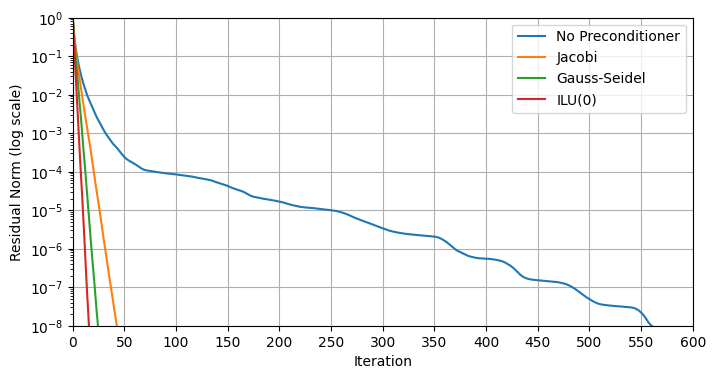

In [6]:
# Print & Plot results
plt.figure(figsize=(8, 4))

for i, errors in enumerate(results):
    # Print number of iterations for convergence
    n_conv = len(errors)
    iterations = range(n_conv)
    plt.plot(iterations, np.abs(errors), label=f'{nice_preconds[i]}')

# Grid and Scale
plt.yscale('log')
plt.grid(True)
plt.xlim([0, 600])
plt.ylim([1e-8, 1])
tick_width = 50
plt.xticks([tick_width*i for i in range(int(650/tick_width))])

# Annotations
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (log scale)')
# plt.title(f'Convergence of full GMRES with and without preconditioning')
plt.legend()

# Save and Plot
filename = "conv_full_gmres.png"
plt.savefig(filename, dpi=300)
plt.show()

**Task 2: GMRES(m)**

For GMRES(m), test and compare the following restart parameters m = 10, 50, 200 with
the runtime required by the full GMRES.

In [7]:
# Max number of Krylov vectors
ms = [10, 50, 200]

# Timing
durations = []
last_time = time()

# Loop
results = []
for m in ms:
    for preconditioner in preconditioners:
        x_approx, errors = GMRES(A, b, x0, m, tol, preconditioner, max_iterations=1000)
        # Status message
        durations.append(round(time() - last_time, 3))
        last_time = time()
        n_conv = len(errors)
        if abs(errors[-1]) > 1:
            print(f"Test 2: sek={durations[-1]}, m={m}, prec={preconditioner} iterations={n_conv} diverged")
        else:
            results.append(errors)
            print(f"Test 2: sek={durations[-1]}, m={m}, prec={preconditioner} iterations={n_conv} ok")

Test 2: sek=6.411, m=10, prec=None iterations=1101 ok
Test 2: sek=2.266, m=10, prec=jacobi iterations=12 diverged
Test 2: sek=2.331, m=10, prec=gauss_seidel iterations=12 diverged
Test 2: sek=47.619, m=10, prec=ilu0 iterations=12 diverged
Test 2: sek=6.27, m=50, prec=None iterations=1021 ok
Test 2: sek=2.524, m=50, prec=jacobi iterations=44 ok
Test 2: sek=2.511, m=50, prec=gauss_seidel iterations=26 ok
Test 2: sek=71.786, m=50, prec=ilu0 iterations=17 ok
Test 2: sek=6.534, m=200, prec=None iterations=835 ok
Test 2: sek=2.617, m=200, prec=jacobi iterations=44 ok
Test 2: sek=2.45, m=200, prec=gauss_seidel iterations=26 ok
Test 2: sek=72.129, m=200, prec=ilu0 iterations=17 ok



**Results**

Test 2: sek=6.655, m=10, prec=None iterations=1101 ok

Test 2: sek=2.756, m=10, prec=jacobi iterations=12 diverged

Test 2: sek=2.931, m=10, prec=gauss_seidel iterations=12 diverged

Test 2: sek=47.913, m=10, prec=ilu0 iterations=12 diverged

Test 2: sek=6.275, m=50, prec=None iterations=1021 ok

Test 2: sek=2.796, m=50, prec=jacobi iterations=44 ok

Test 2: sek=2.577, m=50, prec=gauss_seidel iterations=26 ok

Test 2: sek=71.908, m=50, prec=ilu0 iterations=17 ok

Test 2: sek=6.632, m=200, prec=None iterations=835 ok

Test 2: sek=2.427, m=200, prec=jacobi iterations=44 ok

Test 2: sek=2.715, m=200, prec=gauss_seidel iterations=26 ok

Test 2: sek=71.536, m=200, prec=ilu0 iterations=17 ok


**m=10**

In [23]:
# Print & Plot results
plt.figure(figsize=(8, 4))

# Data
errors = results[0]
n_conv = len(errors)
iterations = range(n_conv)
plt.plot(iterations, np.abs(errors), label=f"No Preconditioner")

# Grid and Scale
# plt.yscale('log')
plt.grid(True)
plt.xlim([0, 600])
plt.ylim([-1, 1])
tick_width = 50
plt.xticks([tick_width*i for i in range(int(650/tick_width))])

# Annotations
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (log scale)')
# plt.title(f'Convergence of GMRES(10) with and without preconditioning')
plt.legend()

# Save and Plot
filename = "conv_gmres_10.png"
plt.savefig(filename, dpi=300)
plt.show()

IndexError: list index out of range

<Figure size 800x400 with 0 Axes>

**m=50**

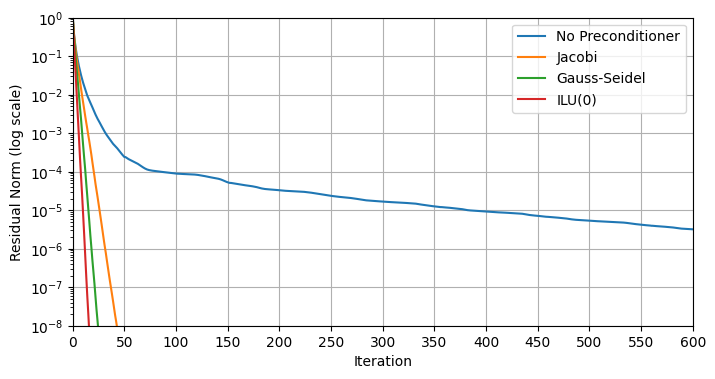

In [9]:
# Print & Plot results
plt.figure(figsize=(8, 4))

# Data
for i in range(4):
    errors = results[1+i]
    n_conv = len(errors)
    iterations = range(n_conv)
    plt.plot(iterations, np.abs(errors), label=f"{nice_preconds[i]}")

# Grid and Scale
plt.yscale('log')
plt.grid(True)
plt.xlim([0, 600])
plt.ylim([1e-8, 1])
tick_width = 50
plt.xticks([tick_width*i for i in range(int(650/tick_width))])

# Annotations
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (log scale)')
# plt.title(f'Convergence of GMRES(50) with and without preconditioning')
plt.legend()

# Save and Plot
filename = "conv_gmres_50.png"
plt.savefig(filename, dpi=300)
plt.show()

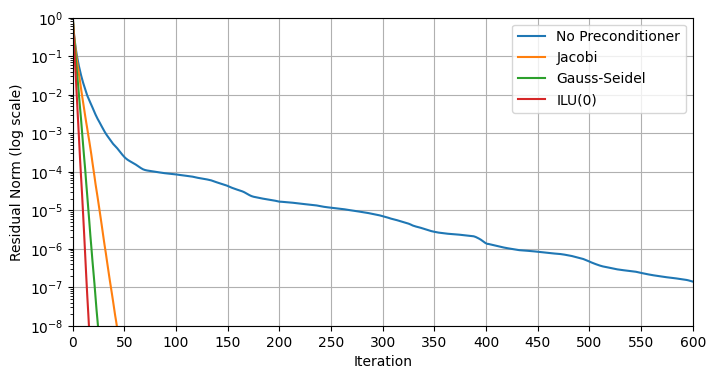

In [10]:
# Print & Plot results
plt.figure(figsize=(8, 4))
plt.cla()

# Data
for i in range(4):
    errors = results[5+i]
    n_conv = len(errors)
    iterations = range(n_conv)
    plt.plot(iterations, np.abs(errors), label=f"{nice_preconds[i]}")

# Grid and Scale
plt.yscale('log')
plt.grid(True)
plt.xlim([0, 600])
plt.ylim([1e-8, 1])
tick_width = 50
plt.xticks([tick_width*i for i in range(int(650/tick_width))])

# Annotations
plt.xlabel('Iteration')
plt.ylabel('Residual Norm (log scale)')
# plt.title(f'Convergence of GMRES(200) with and without preconditioning')
plt.legend()

# Save and Plot
filename = "conv_gmres_200.png"
plt.savefig(filename, dpi=300)
plt.show()

**Task 3: Orthogonality**

For full GMRES (without preconditioning): check the orthogonality of the Krylov vectors.

**Hints**: Plot the computed values of v1 · vk against k on a semi-log scale.

In [11]:
# Max number of Krylov vectors
m = 600

# Timing
durations = []
last_time = time()
# Loop
results = []
preconditioner = None
x_approx, dot_products = GMRES(A, b, x0, m, tol, preconditioner, max_iterations=1000, orthogonality=True)
# Status message
durations.append(round(time() - last_time, 3))
last_time = time()
n_conv = len(dot_products)
print(f"Test 1: sek={durations[-1]}, m=600, prec={preconditioner} iterations={n_conv} ok")


Test 1: sek=7.372, m=600, prec=None iterations=561 ok


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1060\1612884088.py:11: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


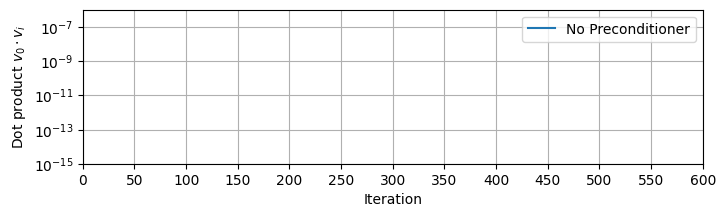

In [16]:
# Print & Plot results
plt.figure(figsize=(8, 2))
plt.cla()

# Data
n_conv = len(dot_products)
iterations = range(n_conv)
plt.plot(iterations, np.abs(dot_products), label=f"No Preconditioner")

# Grid and Scale
plt.yscale('log')
plt.grid(True)
plt.xlim([0, 600])
plt.ylim([1e-15, 1e-6])
tick_width = 50
plt.xticks([tick_width*i for i in range(int(650/tick_width))])

# Annotations
plt.xlabel('Iteration')
plt.ylabel(r'Dot product $v_0\cdot v_i$')
# plt.title(r'Orthogonality check for GMRES without preconditioning: $v_0\cdot v_i$')
plt.legend()

# Save and Plot
filename = "conv_gmres_orthogonality.png"
plt.savefig(filename, dpi=300)
plt.show()

# Conjugate Gradient Method

In [12]:
import os
from time import process_time
import numpy as np
from msr_reader import msr_reader
import matplotlib.pyplot as plt
from conjugate_gradient import conjugate_gradient


In [13]:
# Paths
directory = os.getcwd() + "\\matrices\\"
matrix_files = ["cg_matrix_msr_1.txt", # 0
                "cg_matrix_msr_2.txt", # 1
                "gmres_matrix_msr_1.txt", # 2
                "msr_test_non_symmetric.txt", # 3
                "msr_test_symmetric.txt"] # 4

# Read each matrix
matrices = []
for file in matrix_files:
    path = directory + f"{file}"
    matrices.append(msr_reader(path))
print("matrices read")

matrices read


## **Matrix 1**

In [23]:
# Create Initial Conditions
A = matrices[0]
n = A.shape[0]
x = np.ones(n)
x0 = np.zeros(n)
b = A.dot(x)
tol = 1e-8
m = 100000 # will stop earlier when tol (= 1e-8) is reached

In [24]:
# Solve
x_approx, a_norm_errors, residuals, rel_residuals = conjugate_gradient(A, b, x0, m, tol)

In [25]:
# calculate r_norms
r_norms = []
for r in residuals:
    r_norms.append(np.linalg.norm(r))

In [26]:
# # Print & Plot results
# plt.figure(figsize=(8, 4))
# colors = ["red", "lightcoral", "dodgerblue", "lightskyblue"]

# # Data
# n_conv = len(a_norm_errors)
# iterations = range(n_conv)
# plt.plot(iterations, np.abs(a_norm_errors), label=f"A-norm (M1)", color=colors[2]) # M1
# plt.plot(iterations, np.abs(r_norms), label=f"Norm(residuals) (M1)", color=colors[1])
# plt.plot(iterations, np.abs(rel_residuals), label=f"Residuals (M1)", color=colors[0])

# # Grid and Scale
# plt.yscale('log')
# plt.grid(True)
# plt.ylim([1e-8, 1e10])
# # tick_width = 100
# # plt.xticks([tick_width*i for i in range(int(1100/tick_width))])

# # Annotations
# plt.xlabel('Iteration')
# plt.ylabel('Error Norm')
# plt.legend()

# # Save and Plot
# filename = f"cg_convergence_matrix_1.png"
# plt.tight_layout()
# plt.savefig(filename, dpi=300)
# plt.show()

### **Matrix 2**

In [27]:
# Create Initial Conditions
A = matrices[1]
n = A.shape[0]
x = np.ones(n)
x0 = np.zeros(n)
b = A.dot(x)
tol = 1e-8
m = 100000 # will stop earlier when tol (= 1e-8) is reached

In [28]:
# Solve
x_approx2, a_norm_errors2, residuals2, rel_residuals2 = conjugate_gradient(A, b, x0, m, tol)

In [29]:
# calculate r_norms
r_norms2 = []
for r in residuals2:
    r_norms2.append(np.linalg.norm(r))

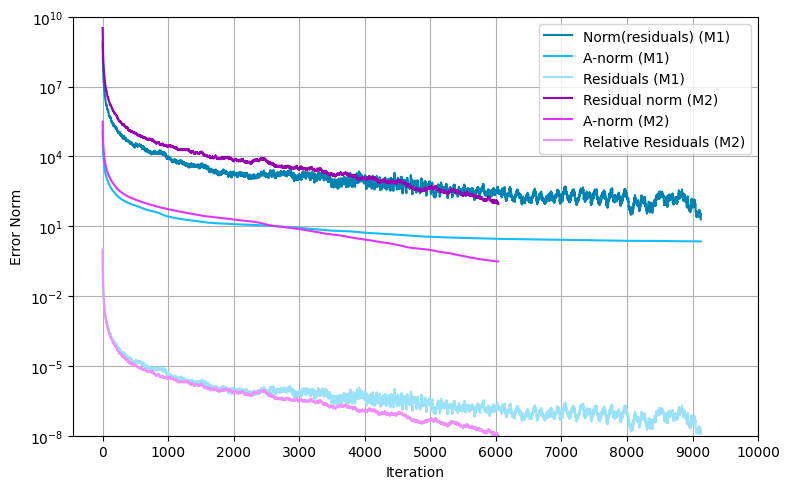

In [70]:
# Print & Plot results
plt.figure(figsize=(8, 5))

c_map1 = ["#0083b3", "#12befd", "#9ae1fa"]
c_map2 = ["#9800b3", "#e134ff", "#ee91ff"]

# MATRIX 1
n_conv = len(a_norm_errors)
iterations = range(n_conv)
plt.plot(iterations, np.abs(r_norms), label=f"Norm(residuals) (M1)", color=c_map1[0])
plt.plot(iterations, np.abs(a_norm_errors), label=f"A-norm (M1)", color=c_map1[1]) # M1
plt.plot(iterations, np.abs(rel_residuals), label=f"Residuals (M1)", color=c_map1[2])

# MATRIX 2
n_conv = len(a_norm_errors2)
iterations = range(n_conv)
plt.plot(iterations, np.abs(r_norms2), label=f"Residual norm (M2)", color=c_map2[0])
plt.plot(iterations, np.abs(a_norm_errors2), label=f"A-norm (M2)", color=c_map2[1])
plt.plot(iterations, np.abs(rel_residuals2), label=f"Relative Residuals (M2)", color=c_map2[2])

# Grid and Scale
plt.yscale('log')
plt.ylim([1e-8, 1e10])
plt.grid(True)
plt.xticks(range(0, 11000, 1000))
# yticks
# magnitude = 1e-8
# tick = magnitude
# yticks = [tick]
# while tick < 1e10:
#     tick = round(tick/magnitude + 1,0)*magnitude
#     yticks.append(tick)
#     if tick >= 9.9*magnitude:
#         magnitude = tick
# plt.yticks(yticks)

# Annotations
plt.xlabel('Iteration')
plt.ylabel('Error Norm')
plt.legend()

# Save and Plot
filename = f"cg_convergence.png"
plt.tight_layout()
plt.savefig(filename, dpi=300)
plt.show()